# Spherical waves

Let the potential $V$ be constant within some region of 3D space (which could be finite or infinite). Within this region, the Schrödinger wave equation reduces to the Helmholtz equation:

$$\left[\nabla^2 + k^2\right] \psi(\mathbf{r}) = 0, \;\;\;\mathrm{where}\;\; k = \sqrt{\frac{2m(E-V)}{\hbar^2}}.$$

For $E > V$, it is well-known that there exist solutions consisting of plane waves with wavenumber $k$. However, we can also find **spherical wave** solutions. Given a choice of coordinate origin, we define spherical coordinates $(r, \theta, \phi)$.  Then the spherical wave solutions have the form

$$\psi(r,\theta,\phi) = A_\ell(kr) Y_{\ell m}(\theta,\phi), \;\;\;\mathrm{where} \;\; A_\ell(z) = \Big\{ j_\ell(z) \;\;\mathrm{or}\;\; y_\ell(z)  \Big\}.$$

Here, $j_\ell$ is called a **spherical Bessel function** of the first kind, $y_\ell$ is called a spherical Bessel function of the second kind, and the $Y_{\ell m}$ is called a **spherical harmonic function**. Let us first focus on the spherical Bessel functions, which determine the radial variation of the spherical waves.

## Spherical Bessel functions

In Python, the spherical Bessel functions can be calculated using [spherical_jn](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.spherical_jn.html) and [spherical_yn](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.spherical_yn.html) from the [scipy.special](https://docs.scipy.org/doc/scipy/reference/special.html) module. Note that these functions are real-valued when the inputs are real; but they can also accept complex inputs, in which case the values are complex-valued.

Here is an example:

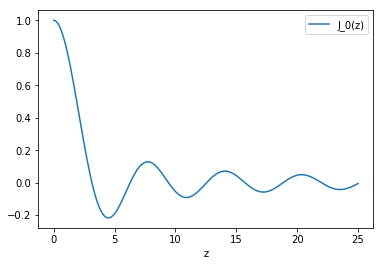

In [3]:
from scipy import *
from scipy.special import spherical_jn, spherical_yn
import matplotlib.pyplot as plt

z  = linspace(1e-6, 25, 200)
j0 = spherical_jn(0, z)    # Spherical Bessel function for l = 0

plt.plot(z, j0, label="J_0(z)")
plt.xlabel('z')
plt.legend()
plt.show()

**Exercise 1**: Modify the above code to (i) plot the spherical Bessel function $j_\ell$ for a few different values of $\ell$, and (ii) graphically verify the limiting expression

$$j_\ell(z)\; \overset{z\rightarrow\infty}{\longrightarrow} \; \frac{\sin(z-\frac{\ell\pi}{2})}{z}.$$

(For full credit, be sure to include all relevant axis/curve labels.)

**Exercise 2**: Modify the above code to (i) plot the spherical Bessel functions of the second kind, $y_\ell$, for a few different values of $\ell$, and (ii) graphically verify the limiting expression

$$y_\ell(z)\; \overset{z\rightarrow\infty}{\longrightarrow} \; - \frac{\cos(z-\frac{\ell\pi}{2})}{z}$$

### Aside: derivatives of spherical Bessel functions

In physics problems involving spherical waves, we often need the derivatives of the spherical Bessel functions. You can obtain these by passing the optional `derivative` argument to [spherical_jn](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.spherical_jn.html) or [spherical_yn](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.spherical_yn.html), as in the following example:

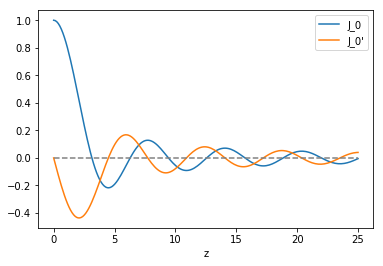

In [2]:
from scipy import *
from scipy.special import spherical_jn, spherical_yn
import matplotlib.pyplot as plt

z   = linspace(1e-6, 25, 200)
j0  = spherical_jn(0, z)                  # Spherical Bessel function for l = 0
j0p = spherical_jn(0, z, derivative=True) # Its derivative

plt.plot(z, j0,  label="J_0")
plt.plot(z, j0p, label="J_0'")
plt.plot([0, z[-1]], [0, 0], color="grey", linestyle="dashed")
plt.xlabel('z')
plt.legend()
plt.show()

## Spherical Hankel functions

The **spherical Hankel functions** are defined as the following combinations of the spherical Bessel functions:

$$h_{\ell}^\pm(z) = j_\ell(z) \pm i y_\ell(z).$$

The + sign refers to a spherical Hankel function of the first kind, and is used to describe "outgoing" waves. The - sign refers to a spherical Hankel function of the second kind, and is used to describe "incoming" waves. This is roughly analogous to the Euler relation $e^{\pm iz} = \cos(z) \pm i\sin(z)$. Note that whereas $j_\ell$ and $y_\ell$ are always real-valued, $h_\ell$ is complex-valued. 

The following example plots $|h_0(z)|^2$ versus $z$. Note the following features:
* The spherical Hankel function blows up at the origin, similar to the spherical Bessel function of the second kind
* The magnitude of the spherical Hankel function varies smoothly, and does not oscillate.
These features support the interpretation that the spherical Hankel function describes a fixed-intensity wavefunction travelling either outward from the coordinate origin, or inward to the origin.

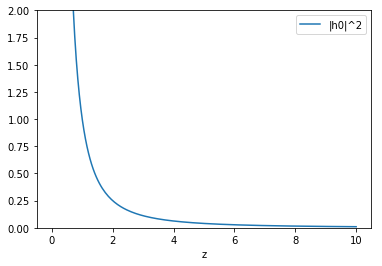

In [6]:
from scipy import *
from scipy.special import spherical_jn, spherical_yn
import matplotlib.pyplot as plt

z = linspace(1e-6, 10, 200)
l = 0

j0 = spherical_jn(0, z)
y0 = spherical_yn(0, z)
h0 = j0 + 1j * y0

plt.plot(z, abs(h0)**2, label='|h0|^2')
plt.xlabel('z')
plt.ylim(0, 2)
plt.legend()
plt.show()

## Spherical harmonics

The spherical harmonic functions $Y_{\ell m}(\theta, \phi)$ describe the angular dependence of spherical waves.  They can be computed using the [sph_harm](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.special.sph_harm.html) function from the [scipy.special](https://docs.scipy.org/doc/scipy/reference/special.html) module.

> ***Warning***: The notation in the [sph_harm](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.special.sph_harm.html) documentation differs from the notation that we (and most physics textbooks) use! What the documentation called $\{n, m, \theta, \phi\}$ is what we call $\{\ell, m, \phi, \theta\}$. Note especially that $\theta$ and $\phi$ are swapped!!

The following example produces a plot showing how the spherical harmonic function varies along the upper hemisphere. The color map shows the value of $\mathrm{Re}[Y_{\ell m}(\theta,\phi)]$, and the radial coordinate in the plot corresponds to the $\theta$ coordinate, with $\theta \in [0, \pi/2]$.

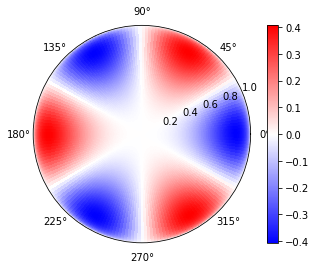

In [22]:
from scipy import *
from scipy.special import sph_harm
import matplotlib.pyplot as plt

## Set up mesh of azimuthal coordinates
phi    = linspace(0, 2*pi, 200)
theta  = linspace(1e-3, 0.5*pi, 200)
theta2d, phi2d = meshgrid(theta, phi)
rho2d  = sin(theta2d)

## Calculate the spherical harmonic
l, m = 4, 3
Y = sph_harm(m, l, phi2d, theta2d)

plt.subplot(projection="polar")
plt.pcolormesh(phi2d, rho2d, real(Y), cmap="bwr")
plt.colorbar()
plt.show()

** Excercise 3**: Write a program to verify the mathematical identity

$$e^{i\mathbf{k} \cdot \mathbf{r}} = \sum_{\ell=0}^\infty \sum_{m=-\ell}^\ell 4 \pi j_{\ell}(kr) e^{i\ell\pi/2} \, Y_{\ell m}^*(\hat{\mathbf{k}}) \, Y_{\ell m}(\hat{\mathbf{r}})$$

where $\hat{\mathbf{k}}$ denotes the angular coordinates corresponding to the vector $\mathbf{k}$, and $\hat{\mathbf{r}}$ denotes the angular coordinates corresponding to the vector $\mathbf{r}$. You are free to choose exactly how to perform this verification; for example, you could calculate the left- and right- hand sides for one or more choices of $\mathbf{k}$ and $\mathbf{r}$, or you could plot some sort of graph. Include ample comments to explain what your program is doing.